# Polynomial Regression

### Importing Needed packages


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Downloading Dataset


In [ ]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

## Reading the data with pandas
- taking a look at the dataset and analyzing data


In [2]:
df = pd.read_csv("FuelConsumption.csv")

df.head() #View the beginning of the data
#tail is used for Viewing the end of the data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## A more concise view of the data


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


## Data Exploration


In [4]:
#data summary 
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## data histogram

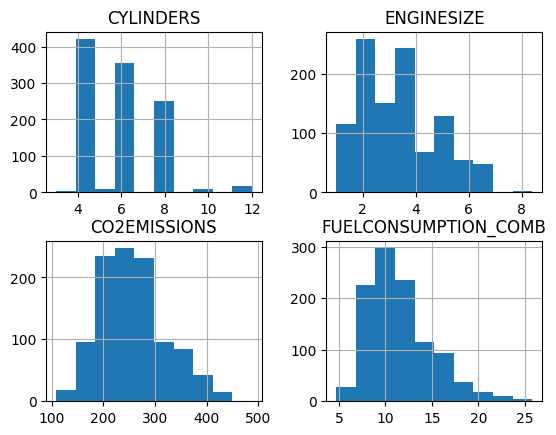

In [5]:
df_hist = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
df_hist.hist()
plt.show()

## drawing plot and scatter

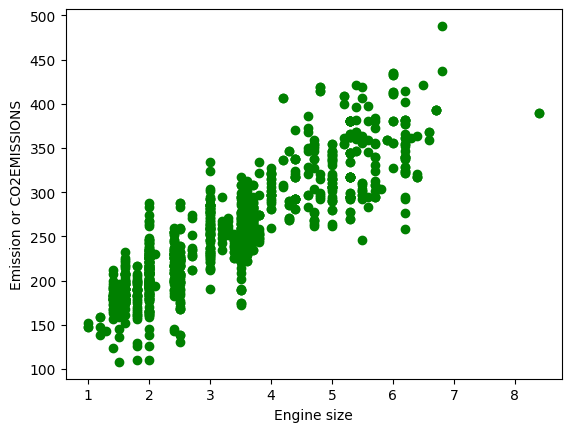

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='green')
plt.xlabel("Engine size")
plt.ylabel("Emission or CO2EMISSIONS")
plt.show()

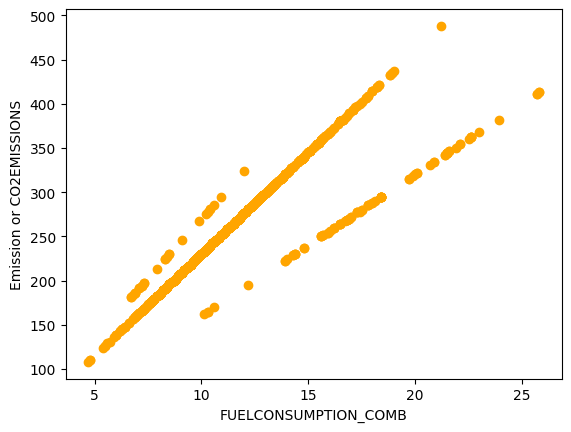

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='orange')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission or CO2EMISSIONS")
plt.show()

## Creating train and test dataset

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

## training model

- x2 ->  X^2
- y=b+θ_1x_1+θ_2x_2    ----  it's that formula for obtaining Polynomial line
- sample for: poly = PolynomialFeatures(degree=2) if values be [[2. ]
 [2.4]
 [1.5]] Each component reaches the power of 0, 1, and 2, and this depends on the degree
- n ^ 0 = 1

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

regr = linear_model.LinearRegression()

#asanyarray: converting to normal array 
#train_x , train_y data are fitted with together and the best line is obtained and it will be final model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(train[['ENGINESIZE']])
test_y = np.asanyarray(train[['CO2EMISSIONS']])

print(train_x[:3])

#PolynomialFeatures: features are those features created by raising existing features to an exponent
poly = PolynomialFeatures(degree=2) 
train_x_poly = poly.fit_transform(train_x)
train_x_poly

[[1.5]
 [3.5]
 [3.5]]


array([[ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [34]:
regr.fit(train_x_poly, train_y)

# Coefficient and Intercept , are the parameters of the fit curvy line
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         50.40994527 -1.52916797]]
Intercept:  [107.1466287]


### final Plot and scatter
- y = 107.14 + 50.4 * x ^ 1 - 1.52 * x ^ 2

Text(0, 0.5, 'Emission or CO2EMISSIONS')

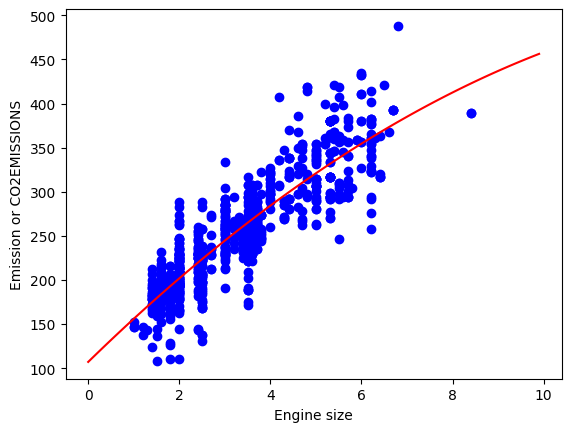

In [35]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission or CO2EMISSIONS")

### model Evaluation

In [36]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predict = regr.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,predict))

Mean absolute error: 23.06
Residual sum of squares (MSE): 960.53
R2-score: 0.76
